In [3]:
# Insights
# For Part I, you must include a written description of three observable trends based on the data.
# 

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys_copy import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities_copy.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
# config url
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q="

# create dataframe and columns 
cities_data_pd = pd.DataFrame({"City": cities})
cities_data_pd["Lat"] = ""
cities_data_pd["Lng"] = ""
cities_data_pd["Max Temp"] = ""
cities_data_pd["Humidity"] = ""
cities_data_pd["Cloudiness"] = ""
cities_data_pd["Wind Speed"] = ""
cities_data_pd["Country"] = ""
cities_data_pd["Date"] = ""

# setting counter to keep track of count and set
count_one = 0
set_one = 1

# Beginning Msg print
print("Beginning Data Retrieval")
print("-----------------------------")
# create loop through each columns in cities list
for index, row in cities_data_pd.iterrows():
    city = row["City"]
    response = requests.get(url + city).json()
    
    try:     
        cities_data_pd.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_data_pd.loc[index, "Country"] = response["sys"]["country"]
        cities_data_pd.loc[index, "Date"] = response["dt"]
        cities_data_pd.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_data_pd.loc[index, "Lat"] = response["coord"]["lat"]
        cities_data_pd.loc[index, "Lng"] = response["coord"]["lon"]
        cities_data_pd.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_data_pd.loc[index, "Wind Speed"] = response["wind"]["speed"]
        #create condition for counts and sets        
        if count_one > 48:
            count_one = 1
            set_one += 1
        else:
            count_one += 1
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
# Endding Msg print
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | buarcos
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | karpinsk
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | wildwood
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | axim
City not found. Skipping...
Processing Record 11 of Set 1 | bowen
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | aosta
Processing Record 14 of Set 1 | moore
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | padang
Processing Record 17 of Set 1 | rocha
Processing Record 18 of Set 1 | haines junction
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | nouadhibou


Processing Record 38 of Set 4 | awjilah
Processing Record 39 of Set 4 | adwa
Processing Record 40 of Set 4 | acambay
Processing Record 41 of Set 4 | morwell
Processing Record 42 of Set 4 | atambua
Processing Record 43 of Set 4 | gushikawa
Processing Record 44 of Set 4 | bereda
Processing Record 45 of Set 4 | paita
Processing Record 46 of Set 4 | dunedin
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | xichang
Processing Record 49 of Set 4 | kieta
Processing Record 1 of Set 5 | sept-iles
Processing Record 2 of Set 5 | tuatapere
City not found. Skipping...
Processing Record 3 of Set 5 | solnechnyy
Processing Record 4 of Set 5 | port hedland
City not found. Skipping...
Processing Record 5 of Set 5 | mogadishu
City not found. Skipping...
Processing Record 6 of Set 5 | half moon bay
Processing Record 7 of Set 5 | sehore
Processing Record 8 of Set 5 | narsaq
Processing Record 9 of Set 5 | oussouye
Processing Record 10 of Set 5 | chumikan
Processing Record 11 of Set 5 

City not found. Skipping...
Processing Record 33 of Set 8 | sioux city
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | kirkuk
Processing Record 36 of Set 8 | hare bay
Processing Record 37 of Set 8 | tank
Processing Record 38 of Set 8 | santa cecilia
Processing Record 39 of Set 8 | nyurba
Processing Record 40 of Set 8 | pevek
Processing Record 41 of Set 8 | chaiyaphum
Processing Record 42 of Set 8 | mayo
Processing Record 43 of Set 8 | yulara
Processing Record 44 of Set 8 | shirokiy
Processing Record 45 of Set 8 | lewisville
Processing Record 46 of Set 8 | vung tau
Processing Record 47 of Set 8 | hvolsvollur
Processing Record 48 of Set 8 | yining
Processing Record 49 of Set 8 | samarai
Processing Record 1 of Set 9 | romny
Processing Record 2 of Set 9 | bell ville
Processing Record 3 of Set 9 | paciran
Processing Record 4 of Set 9 | tyukhtet
Processing Record 5 of Set 9 | poum
Processing Record 6 of Set 9 | dhuburi
Processing Record 7 of Set 9 | angoche
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
# show counts of rows in df
cities_data_pd.count()

City          611
Lat           611
Lng           611
Max Temp      611
Humidity      611
Cloudiness    611
Wind Speed    611
Country       611
Date          611
dtype: int64

In [66]:
# display df
cities_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,buarcos,40.17,-8.88,73.99,78,20,12.75,PT,1595939368
1,jamestown,42.1,-79.24,72,88,1,5.82,US,1595939368
2,vaini,-21.2,-175.2,69.8,77,20,10.29,TO,1595939361
3,kapaa,22.08,-159.32,78.8,83,90,19.46,US,1595939369
4,karpinsk,59.77,60.01,68.4,45,82,4.76,RU,1595939369


In [65]:
# output data to csv
cities_data_pd.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [131]:
weather_csv_file = "cities_copy.csv"

weather_df = pd.read_csv(weather_csv_file)
weather_df = weather_df.drop(weather_df.columns[0], axis =1)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,buarcos,40.17,-8.88,73.99,78.0,20.0,12.75,PT,1.595939e+09
1,jamestown,42.10,-79.24,72.00,88.0,1.0,5.82,US,1.595939e+09
2,vaini,-21.20,-175.20,69.80,77.0,20.0,10.29,TO,1.595939e+09
3,kapaa,22.08,-159.32,78.80,83.0,90.0,19.46,US,1.595939e+09
4,karpinsk,59.77,60.01,68.40,45.0,82.0,4.76,RU,1.595939e+09


In [134]:
#  Get the indices of cities that have humidity over 100%.
humidity_over = weather_df.loc[weather_df["Humidity"] > 100]
humidity_over

# since there's no record, there is no cities with humidity over 100.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

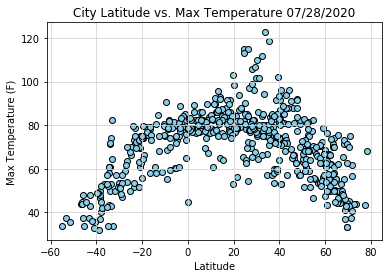

In [128]:

plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()



## Latitude vs. Humidity Plot

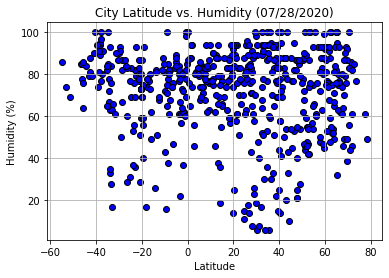

In [114]:

plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", facecolor="blue", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatHumidity.png")


## Latitude vs. Cloudiness Plot

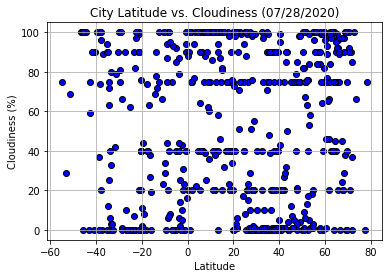

In [116]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", facecolor="blue", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatCloudiness.png")

## Latitude vs. Wind Speed Plot

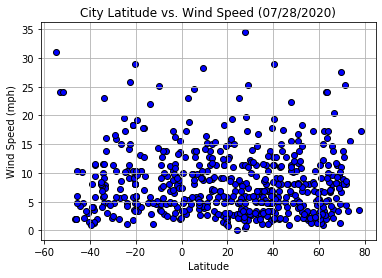

In [117]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", facecolor="blue", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatWindSpeed.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


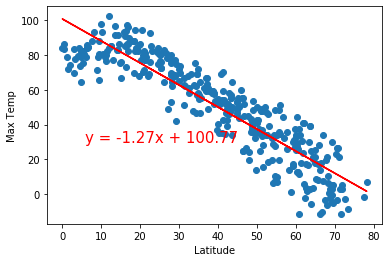

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


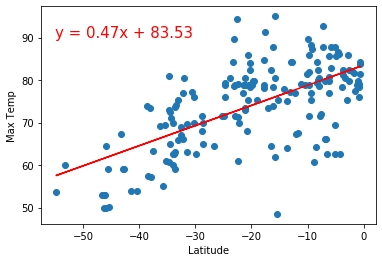

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


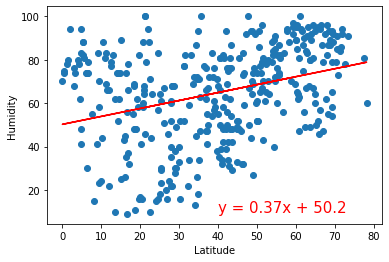

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


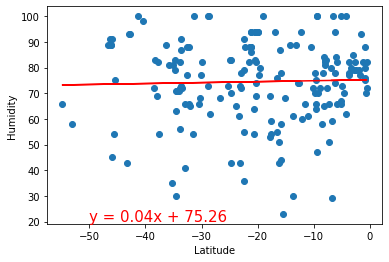

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


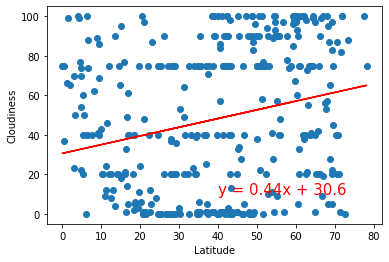

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


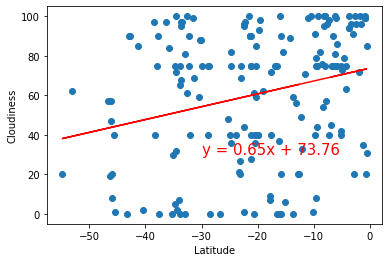

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


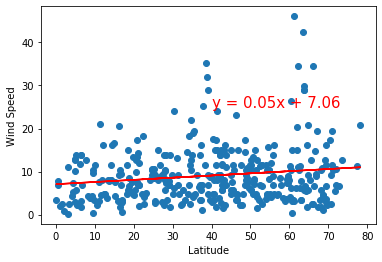

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


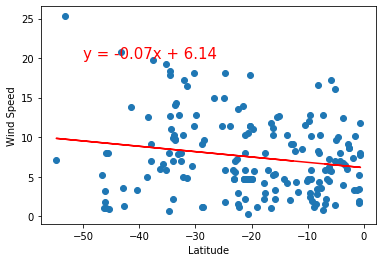